In [47]:
import tskit
import pyslim
import msprime
import itertools
import operator
import numpy as np
from collections import defaultdict

In [58]:
orig_ts = tskit.load('overlay.trees')

In [59]:
orig_ts

In [60]:
rts = pyslim.recapitate(orig_ts,10)

/home/bjarkemp/miniforge3/envs/recapitation/lib/python3.13/site-packages/msprime/ancestry.py:1290: TimeUnitsMismatchWarning: The initial_state has time_units=ticks but time is measured in generations in msprime. This may lead to significant discrepancies between the timescales. If you wish to suppress this warning, you can use, e.g., warnings.simplefilter('ignore', msprime.TimeUnitsMismatchWarning)
  sim = _parse_sim_ancestry(


In [61]:
rts.draw_svg(size=(1000,500))

ValueError: Image size too small to fit

<!-- # // Starting run at tick <start>:
# 1 

# object()<Individual>
# object()<Individual>
# 16977090
# Individual<p1:i1>
# 77355674
# Individual<p1:i8>
# 67481271
# Individual<p1:i3 -->
<!-- # object()<Individual>
# object()<Individual>
# object()<Individual>
# object()<Individual>
# object()<Individual> -->

In [62]:
def edges_by_child_timeasc(ts):
    # edges sorted by child node time, then child node id using np.lexsort
    it = (ts.edge(u) for u in np.lexsort((ts.edges_child, ts.nodes_time[ts.edges_child])))
    return itertools.groupby(it, operator.attrgetter("child"))


chi_ids = []
use_nodes = (rts.nodes_flags & tskit.NODE_IS_SAMPLE) != 0
for child_id, edges in edges_by_child_timeasc(rts):
    if len({e.parent for e in edges}) > 1:
        use_nodes[child_id] = True
        chi_ids.append(child_id)
        print(child_id)
sim_ts, mapp = rts.simplify(np.where(use_nodes)[0], update_sample_flags=False, map_nodes=True) # keep the nodes with multiple parents, but don't flag as samples
[mapp[ch] for ch in chi_ids]

115
116
117
122
123
124
125
126
127
128
133
101
102
103
104
105
106
107
108
109
110
111
112
113
114
88
89
91
92
94
95
96
97
98
99
74
75
77
78
81
84
64
67
68
70
71
73
52
53
55
57
59
40
44
45
48
49
50
29
31
37
38
21
22
23
24
25
27
11
12
13
15
1
2
3
8
136


[np.int32(65),
 np.int32(66),
 np.int32(67),
 np.int32(72),
 np.int32(73),
 np.int32(74),
 np.int32(75),
 np.int32(76),
 np.int32(77),
 np.int32(78),
 np.int32(83),
 np.int32(51),
 np.int32(52),
 np.int32(53),
 np.int32(54),
 np.int32(55),
 np.int32(56),
 np.int32(57),
 np.int32(58),
 np.int32(59),
 np.int32(60),
 np.int32(61),
 np.int32(62),
 np.int32(63),
 np.int32(64),
 np.int32(41),
 np.int32(42),
 np.int32(43),
 np.int32(44),
 np.int32(45),
 np.int32(46),
 np.int32(47),
 np.int32(48),
 np.int32(49),
 np.int32(50),
 np.int32(35),
 np.int32(36),
 np.int32(37),
 np.int32(38),
 np.int32(39),
 np.int32(40),
 np.int32(29),
 np.int32(30),
 np.int32(31),
 np.int32(32),
 np.int32(33),
 np.int32(34),
 np.int32(24),
 np.int32(25),
 np.int32(26),
 np.int32(27),
 np.int32(28),
 np.int32(18),
 np.int32(19),
 np.int32(20),
 np.int32(21),
 np.int32(22),
 np.int32(23),
 np.int32(14),
 np.int32(15),
 np.int32(16),
 np.int32(17),
 np.int32(8),
 np.int32(9),
 np.int32(10),
 np.int32(11),
 np.int32(12

In [63]:
sim_ts

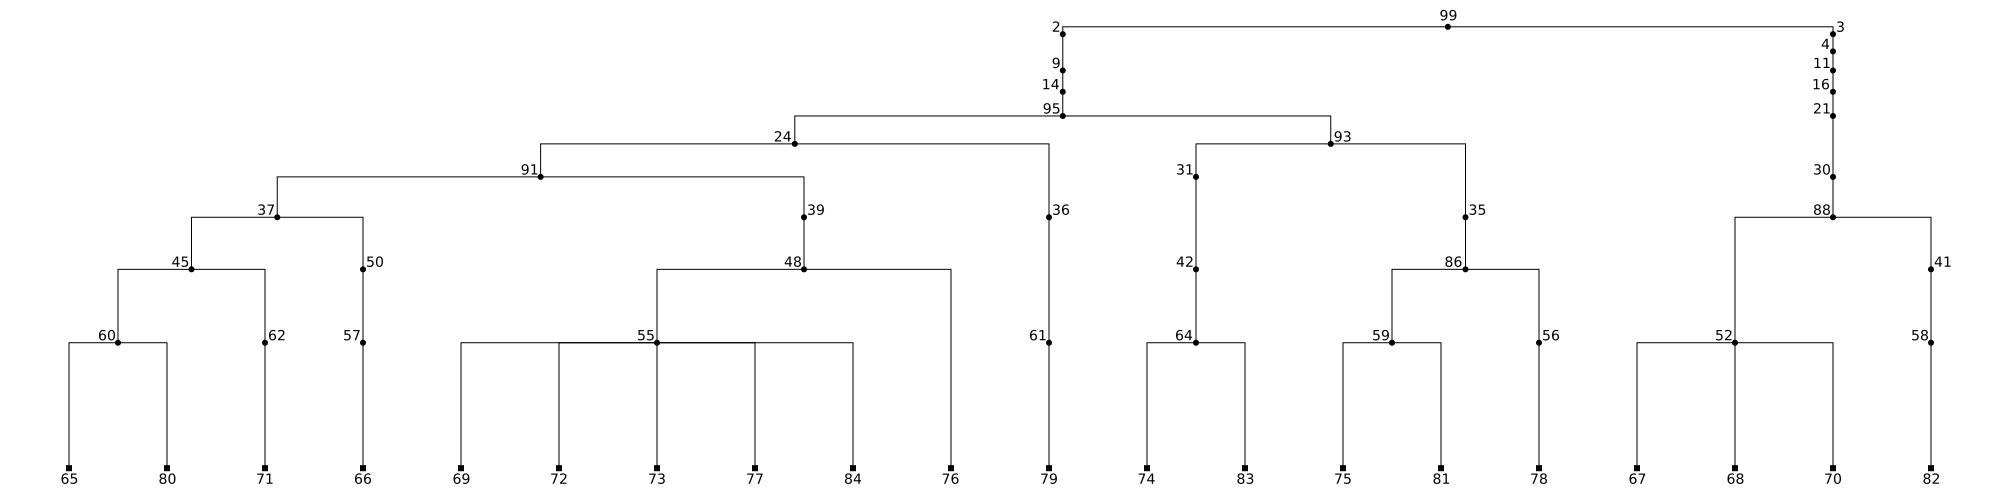

In [65]:
sim_ts.at(0).draw_svg(size=(2000,500),time_scale='log_time')

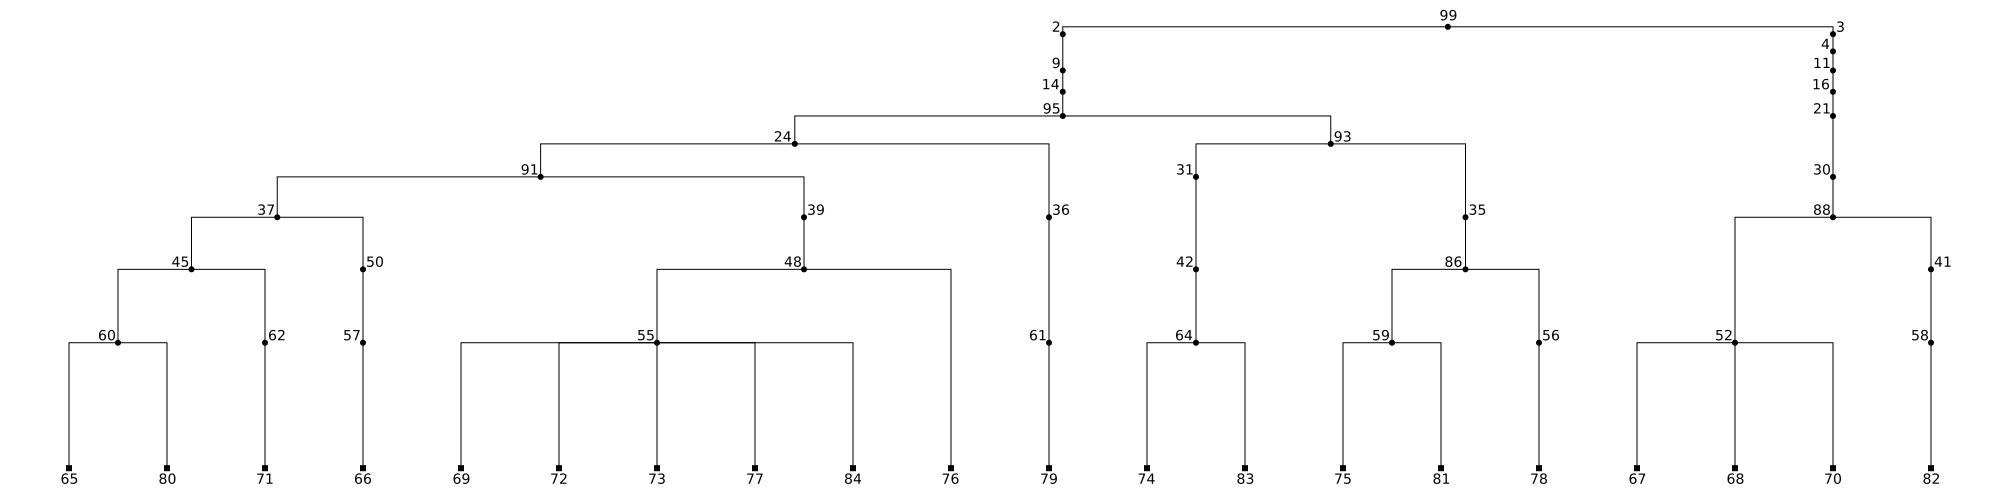

In [66]:
sim_ts.at(1).draw_svg(size=(2000,500),time_scale='log_time')